In [125]:
# This should be shared between each text exercise
# Apply the operations to the clean_biography column
import spacy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

# Load the spacy model
nlp = spacy.load('en_core_web_sm')

physics_and_chemistry_nobel_laureate = pd.read_csv("physics_and_chemistry_nobel_laureate.csv")

print(physics_and_chemistry_nobel_laureate['clean_biography'])

0      Wilhelm Conrad Röntgen german pronunciation ˈv...
1      Hendrik Antoon Lorentz July February dutch phy...
2      Pieter Zeeman Dutch ˈzeːmɑn October dutch phys...
3      Antoine Henri Becquerel french pronunciation b...
4      Pierre Curie KURE ee French pjɛʁ kyʁi April fr...
                             ...                        
195    Sir Aaron Klug August November british biophys...
196    Henry Taube November November Canadian bear am...
197    Robert Bruce Merrifield July american biochemi...
198    Herbert Aaron Hauptman February October americ...
199    Jerome Karle bear Jerome Karfunkle June June a...
Name: clean_biography, Length: 200, dtype: object


## Text

Vocabulary: 50 most frequent words and word cloud for each category (Text)

Word Dictionary:  {'University': 1050, 'work': 891, 'Physics': 742, 'Nobel': 690, 'theory': 590, 'year': 543, 'Prize': 527, 'Einstein': 468, 'physics': 458, 'Institute': 428, 'Bohr': 425, 'research': 398, 'physicist': 391, 'time': 373, 'later': 359, 'paper': 353, 'quantum': 348, 'Feynman': 340, 'study': 336, 'receive': 330, 'award': 323, 'know': 318, 'include': 314, 'Academy': 313, 'Heisenberg': 309, 'nuclear': 305, 'publish': 303, 'particle': 296, 'Society': 286, 'ray': 284, 'life': 284, 'Sciences': 284, 'American': 280, 'bear': 274, 'professor': 267, 'field': 265, 'die': 259, 'der': 259, 'National': 258, 'new': 256, 'early': 255, 'Fermi': 255, 'discovery': 254, 'Laboratory': 253, 'Science': 252, 'New': 250, 'name': 249, 'physic': 244, 'experiment': 239, 'Medal': 236}


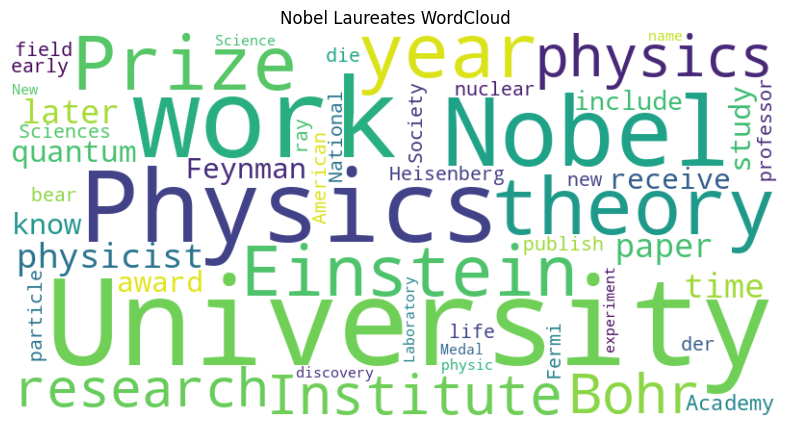

Word Dictionary:  {'University': 735, 'work': 728, 'Nobel': 574, 'Chemistry': 433, 'chemistry': 426, 'Prize': 394, 'research': 390, 'year': 339, 'study': 338, 'award': 298, 'Society': 285, 'structure': 247, 'life': 246, 'receive': 236, 'Hahn': 235, 'Institute': 234, 'chemical': 233, 'Academy': 232, 'time': 232, 'later': 224, 'include': 222, 'Sciences': 208, 'Haber': 197, 'chemist': 196, 'early': 186, 'publish': 182, 'American': 182, 'Science': 177, 'know': 170, 'reaction': 170, 'Royal': 167, 'develop': 166, 'National': 166, 'bear': 165, 'professor': 164, 'element': 162, 'Chemical': 161, 'World': 160, 'german': 158, 'scientific': 155, 'new': 154, 'member': 154, 'die': 151, 'method': 150, 'name': 149, 'Medal': 148, 'Research': 142, 'theory': 142, 'science': 141, 'molecule': 137}


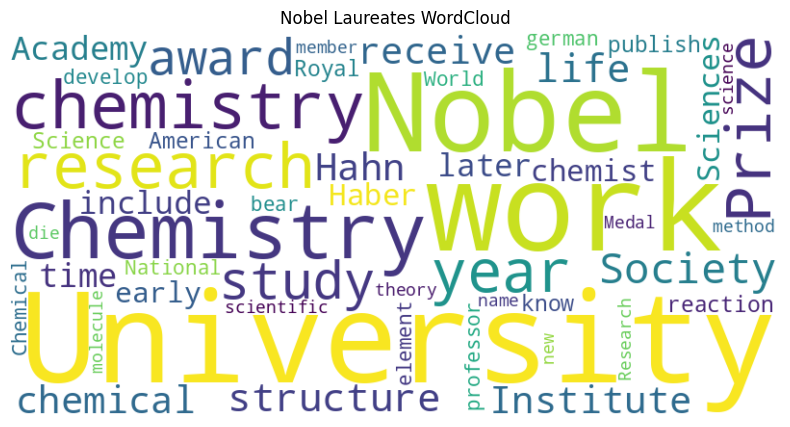

In [126]:
def plot_wordcloud(text):
    # Generate the 50 most frequent words in the laureates' biographies
    word_freq = Counter(text.split()).most_common(50)
    word_dict = dict(word_freq)
    print("Word Dictionary: ", word_dict)
    # Create a WordCloud object for the laureates 50 most frequent words
    wordcloud = WordCloud(width=800, height=400, background_color ='white').fit_words(word_dict)
    # Plot the WordCloud for the laureates
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nobel Laureates WordCloud')
    plt.show()

# Combine physics laureate biographies into a single string
physics_text = ' '.join(physics_and_chemistry_nobel_laureate[physics_and_chemistry_nobel_laureate['category'] == 'Physics']['clean_biography'])

# Combine chemistry laureate biographies into a single string
chemistry_text = ' '.join(physics_and_chemistry_nobel_laureate[physics_and_chemistry_nobel_laureate['category'] == 'Chemistry']['clean_biography'])

# Plot the WordCloud for the physics laureates
plot_wordcloud(physics_text)

# Plot the WordCloud for the chemistry laureates
plot_wordcloud(chemistry_text)


## Graphs

In [127]:
import os

# Fetch Corresponding Knowledge Graph json file for each laureate using their name
def retrieve_knowlege_graph(name_category):
    # Remove all white spaces from the name
    name = name_category['name'].replace(" ", "")
    category = name_category['category'].lower()
    # Load the knowledge graph json file
    try:
        json = pd.read_json(os.path.join(f"{category}_nobel_laureate", f"{name}.json"))
        return json
    except Exception as e:
        print(f"File {name}.json not found", e)

# Retrieve the knowledge graph for each laureate
physics_and_chemistry_nobel_laureate['knowledge_graph'] = physics_and_chemistry_nobel_laureate[[ 'name', 'category']].apply(retrieve_knowlege_graph, axis=1)

RDF properties: 50 most frequent properties and property cloud for each category

knowledge_graph                                          predicate  \
0       http://www.w3.org/2000/01/rdf-schema#label   
1     http://www.w3.org/2000/01/rdf-schema#comment   
2         http://dbpedia.org/property/signatureAlt   
3                http://dbpedia.org/property/sname   
4                 http://dbpedia.org/property/sopt   
...                                            ...   
3128         http://dbpedia.org/property/birthName   
3129            http://dbpedia.org/property/spouse   
3130          http://dbpedia.org/ontology/abstract   
3131            http://dbpedia.org/property/prizes   
3132         http://dbpedia.org/ontology/birthName   

                                                 object  
0                                       Wilhelm Röntgen  
1     Wilhelm Conrad Röntgen (/ˈrɛntɡən, -dʒən, ˈrʌn...  
2                                         W. C. Röntgen  
3                                Wilhelm Conrad Röntgen  
4                                            

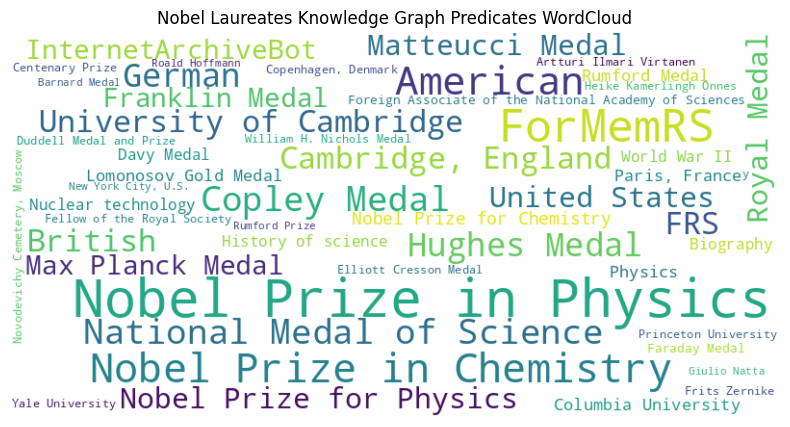

In [139]:

def plot_predicate_cloud(predicates):
    # Create a WordCloud object for the predicates
    wordcloud = WordCloud(width=800, height=400, background_color ='white').fit_words(predicates)
    # Plot the WordCloud for the predicates
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nobel Laureates Knowledge Graph Predicates WordCloud')
    plt.show()

# Concat all knowledge_graph columns into a single dataframe
knowledge_graph = pd.concat(physics_and_chemistry_nobel_laureate['knowledge_graph'].tolist(), ignore_index=True)

common_words = ['', 'yes', 'no', 'right']
# remove empty strings, yes and no values from the knowledge graph
predicates = knowledge_graph['object'].apply(lambda x: x if x not in common_words else None).dropna()
predicates = predicates.value_counts()
predicates = predicates.to_dict()
# Get first 50 with the highest frequency
predicates = dict(list(predicates.items())[:50])
print("predicates", predicates)
print("Length of Predicates", len(predicates))

# Plot the WordCloud for the predicates
plot_predicate_cloud(predicates)



Facts: Min/max/avg number of facts per category together. Histograms and box plots for number of facts per graph for each category

{'Nobel Prize in Physics': 31, 'ForMemRS': 12, 'Hughes Medal': 10, 'Nobel Prize for Physics': 9, 'American': 9, 'Matteucci Medal': 9, 'Max Planck Medal': 8, 'InternetArchiveBot': 8, 'Franklin Medal': 7, 'Copley Medal': 7, 'History of science': 6, 'Physics': 6, 'World War II': 6, 'Nuclear technology': 6, 'Biography': 6, 'Columbia University': 6, 'National Medal of Science': 6, 'British': 6, 'Royal Medal': 6, 'University of Cambridge': 6, 'United States': 6, 'Lomonosov Gold Medal': 6, 'Frits Zernike': 5, 'Rumford Medal': 5, 'Princeton University': 5, 'Faraday Medal': 5, 'Duddell Medal and Prize': 5, 'Cambridge, England': 5, 'Heike Kamerlingh Onnes': 5, 'Copenhagen, Denmark': 5, 'Novodevichy Cemetery, Moscow': 5, 'German': 5, 'Niels Bohr': 4, 'Owen Chamberlain': 4, 'Barnard Medal': 4, 'Henry Draper Medal': 4, 'Oliver E. Buckley Condensed Matter Prize': 4, 'Henri Becquerel': 4, 'Rumford Prize': 4, 'Victor Franz Hess': 4, 'University of Chicago': 4, 'y': 4, 'Elliott Cresson Medal': 4, 'Robe

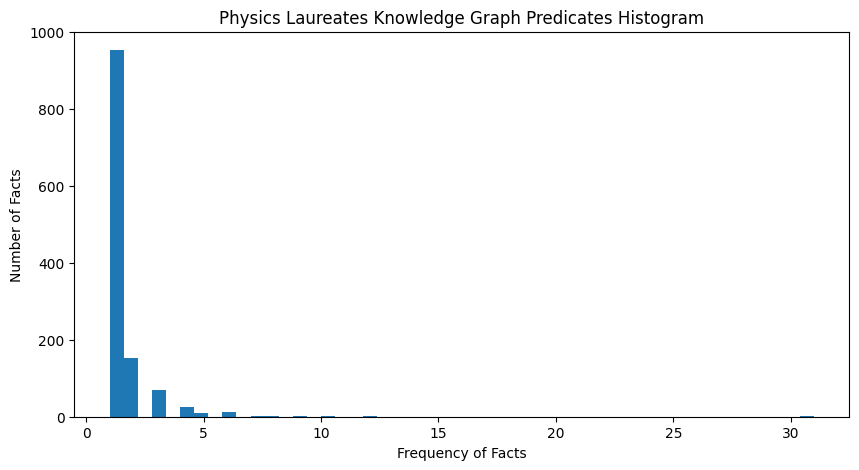

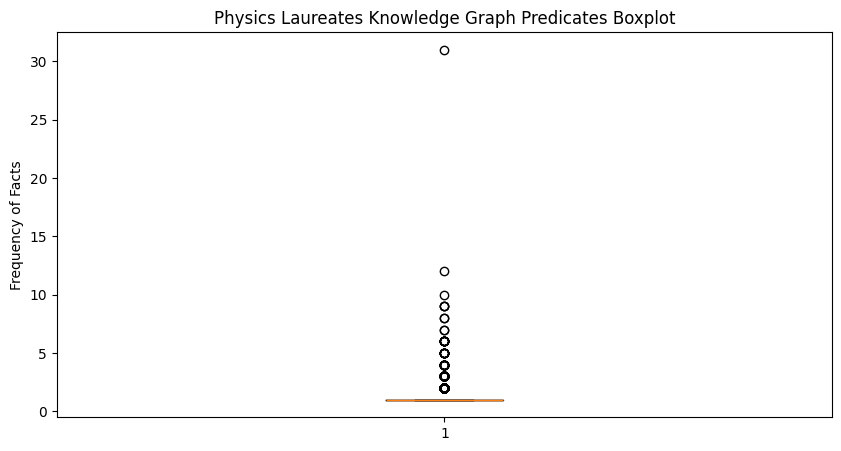

In [157]:
# Extract Knowledge Graph for each category

# Extract Knowledge Graph for Physics laureates
physics_knowledge_graph = physics_and_chemistry_nobel_laureate[physics_and_chemistry_nobel_laureate['category'] == 'Physics']['knowledge_graph']
physics_knowledge_graph = pd.concat(physics_knowledge_graph.tolist(), ignore_index=True)

physics_predicates = physics_knowledge_graph['object'].apply(lambda x: x if x not in common_words else None).dropna()
physics_predicates = physics_predicates.value_counts()
physics_predicates = physics_predicates.to_dict()
print(physics_predicates)

# Min and Max values for Physics predicates
print(f"Physics Fact with Min Number {min(physics_predicates.values())}", min(physics_predicates))
print(f"Physics Fact with Max Number {max(physics_predicates.values())}", max(physics_predicates))

# Average number of facts for Physics laureates
print(f"Average number of facts for Physics laureates {sum(physics_predicates.values())/len(physics_predicates)}")

# Plot physics predicates on histogram
plt.figure(figsize=(10, 5))
plt.hist(physics_predicates.values(), bins=50)
plt.xlabel('Frequency of Facts')
plt.ylabel('Number of Facts')
plt.title('Physics Laureates Knowledge Graph Predicates Histogram')
plt.show()  # Show the histogram


# Boxplot for Physics predicates, what do we plot here?

